In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_49422_R')

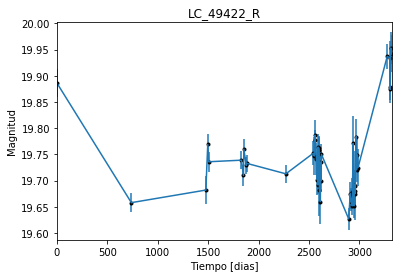

In [2]:
data = np.genfromtxt('LC_49422_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_49422_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

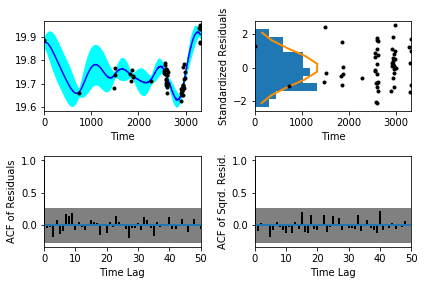

In [5]:
sample.assess_fit()

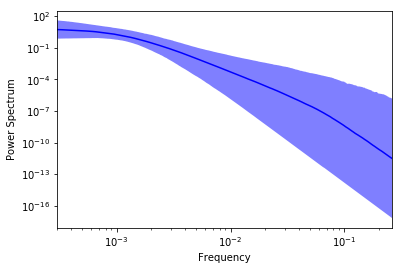

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_49422_R')

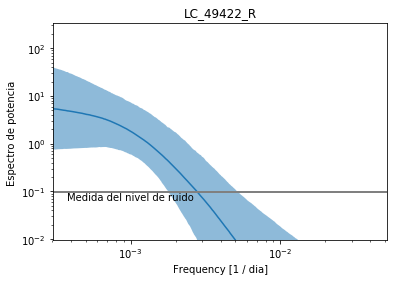

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_49422_R')

Text(0.5,1,'Prediccion , valor esperado LC_49422_R')

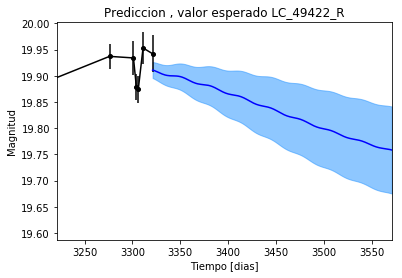

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_49422_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_49422_R')

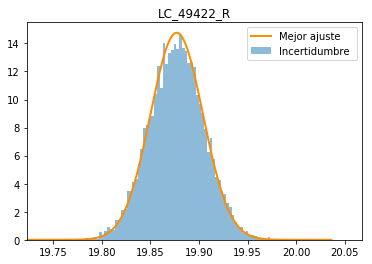

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_ 49422_R')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_R')

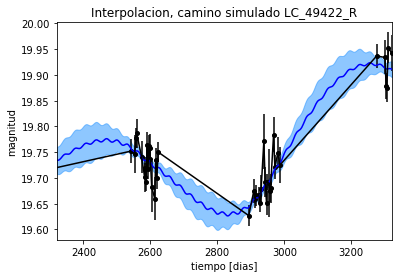

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_R')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_R')

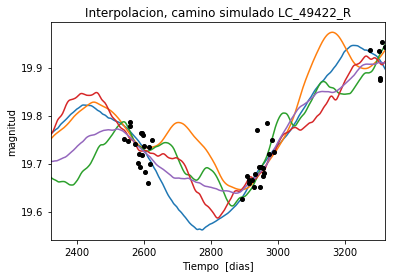

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1079.1123382
Median: 0.00601546166508
Standard deviation: 0.0972398697135
68% credibility interval: [ 0.00068109  0.08863589]
95% credibility interval: [  3.43223313e-04   3.84412041e-01]
99% credibility interval: [  3.08412833e-04   4.90547160e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1440.80906572
Median: 0.00136974628159
Standard deviation: 0.0437438848978
68% credibility interval: [ 0.00046945  0.012548  ]
95% credibility interval: [ 0.00032475  0.13228657]
99% credibility interval: [  3.05456711e-04   3.28064991e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1288.34442737
Median: 0.00486292861766
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1515.5541569
Median: 116.624728616
Standard deviation: 1.63236856582
68% credibility interval: [ 114.87470867  117.89468587]
95% credibility interval: [ 112.42052243  118.83372313]
99% credibility interval: [ 110.40486135  119.26697847]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1450.46830351
Median: 0.26917397989
Standard deviation: 1.11634889105
68% credibility interval: [ 0.02998171  1.96590461]
95% credibility interval: [ 0.01160123  3.71341124]
99% credibility interval: [ 0.00918337  5.25152903]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 404.566303862
Median: 0.103355861017
Standard deviation: 2.20332098083
68% credibility interval: [ 0.00460192  1.90596182]
95% credibility interval: [  3.77904214e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.31191981293e-39
Standard deviation: 1.39651866322e+23
68% credibility interval: [  3.84167942e-81   2.31425224e-10]
95% credibility interval: [  6.23689376e-114   7.64855211e+002]
99% credibility interval: [  3.00080910e-119   1.12518962e+006]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1507.74305265
Median: 19.7626602069
Standard deviation: 0.0611502406774
68% credibility interval: [ 19.71651562  19.81298963]
95% credibility interval: [ 19.65269066  19.90318028]
99% credibility interval: [ 19.59417503  19.99426364]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 289.755320119
Median: 0.00271819107977
Standard deviation: 0.117822168447
68% credibility interval: [ 0.          0.16397552]
95% credibility interval: [ 0.          0.44025261]
99% credibility interval: [ 0.          0.50581366]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 289.755320119
Median: 0.00271819107977
Standard deviation: 0.117822168447
68% credibility interval: [ 0.          0.16397552]
95% credibility interval: [ 0.          0.44025261]
99% credibility interval: [ 0.          0.50581366]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 430.246191366
Median: 0.0
Standard deviation: 0.000518049690988
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1515.5541569
Median: 116.624728616
Standard deviation: 1.63236856582
68% credibility interval: [ 114.87470867  117.89468587]
95% credibility interval: [ 112.42052243  118.83372313]
99% credibility interval: [ 110.40486135  119.26697847]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1681.13320208
Median: 0.0120554507216
Standard deviation: 0.0177687657116
68% credibility interval: [ 0.00670304  0.02556463]
95% credibility interval: [ 0.0041554   0.06109504]
99% credibility interval: [ 0.00308523  0.11293742]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1686.11467189
Median: 1.18420033544
Standard deviation: 0.186248760698
68% credibility interval: [ 1.01890188  1.37838799]
95% credibility interval: [ 0.87256104  1.61130674]
99% credibility interval: [ 0.7874556   1.77999744]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 597.616789499
Median: 1.10270341726e-05
Standard deviation: 0.00572876993055
68% credibility interval: [  2.83077010e-07   3.02048418e-04]
95% credibility interval: [  5.61496387e-09   5.72395808e-03]
99% credibility interval: [  1.96759262e-11   3.63358834e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1079.1123382
Median: (-0.0377962603499-0.299526413376j)
Standard deviation: 0.959861300004
68% credibility interval: [-0.55691572-0.98881172j -0.00427942-0.47612729j]
95% credibility interval: [ -2.41533209e+00+0.j         -2.15653568e-03-0.0060375j]
99% credibility interval: [ -3.08219871e+00+0.j          -1.93781498e-03-0.20701193j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1440.80906572
Median: (-0.00860636971104+1.31199070985j)
Standard deviation: 0.789673940074
68% credibility interval: [-0.07884143+0.06149818j -0.00294962+0.j        ]
95% credibility interval: [-0.83118104+1.06841138j -0.00204046+0.01227423j]
99% credibility interval: [ -2.06129313e+00+1.71468382j  -1.91924112e-03+0.j        ]
Posterior sum